In [1]:

import pandas as pd
from sklearn.cross_validation import train_test_split
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy  as np
#import lightgbm as lgb

d:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
orial_data = pd.read_csv('data/train.csv',parse_dates=[2])
orial_data.head()
orial_data.shape[0]

d:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


1017209

In [3]:
#数据拷贝一份进行处理，避免 对原始数据的改变
data_data = orial_data.copy()
#data_data.describe()
data_data.shape[0]

1017209

In [4]:
# 加载store 数据
store = pd.read_csv('data/store.csv')
data_store = store.copy()
#异常值处理
fill_values = {'CompetitionOpenSinceYear': 0, 'CompetitionDistance': 1, 'CompetitionOpenSinceMonth': 0, 'CompetitionOpenSinceYear': 0,'Promo2SinceWeek':0,'Promo2SinceYear':0,'PromoInterval':'None' }
data_store.fillna(value=fill_values,inplace = True)
store_drop_columns = ['CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2SinceWeek','Promo2SinceYear','PromoInterval']
data_store.drop(store_drop_columns,axis=1,inplace=True)
data_store.head(20)
data_store.shape[0]


1115

In [5]:
#加载test 数据
test = pd.read_csv('data/test.csv')
data_test = test.copy()
data_test.fillna(value={'Open':1},inplace=True)
data_test.head(10)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
5,6,10,4,2015-09-17,1.0,1,0,0
6,7,11,4,2015-09-17,1.0,1,0,0
7,8,12,4,2015-09-17,1.0,1,0,0
8,9,13,4,2015-09-17,1.0,1,0,0
9,10,14,4,2015-09-17,1.0,1,0,0


In [6]:
#将字符的属性转换成数字
replace_data = {'a':1,'b':2,'c':3,'d':4}
print(type(data_store))
print(type(data_store['Assortment']))
print(type(data_store.Assortment))
data_store['Assortment'].replace(replace_data,inplace=True)
data_store['StoreType'].replace(replace_data,inplace=True)

data_store.head(10)

data_data['StateHoliday'].replace(replace_data,inplace=True)
data_data['StateHoliday'] = data_data['StateHoliday'].apply(pd.to_numeric)
data_data.shape[0]

data_test['StateHoliday'].replace(replace_data,inplace=True)
data_test['StateHoliday'] = data_test['StateHoliday'].apply(pd.to_numeric)
print(data_test['StateHoliday'].unique())

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
[0 1]


In [7]:
# 进行归一化 对CompetitionDistance

scaler = MinMaxScaler()
x = data_store['CompetitionDistance'].values.reshape(-1,1)
data_store['CompetitionDistance'] = scaler.fit_transform(x)
data_store.head(5)


,Store,StoreType,Assortment,CompetitionDistance,Promo2
0,1,3,1,0.016728,0
1,2,1,1,0.007501,1
2,3,1,1,0.186253,1
3,4,3,3,0.008160,0
4,5,1,1,0.394271,0


In [8]:
#pd.get_dummies(data_store)
data_test.head(1)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0


In [9]:
data_data.head(3)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1


In [10]:
# 提取出月份、年份,数据增加年份和月份的列
import time, datetime
def conver_date(data):
    print(data.head(5))
    data_month = pd.to_datetime(data['Date'],format='%Y-%m-%d %H:%M:%S')
    data_date = pd.to_datetime(data['Date'],format='%Y/%m/%d')
    data['year'] = data_date.dt.year
    data['month'] = data_date.dt.month
    data['day'] = data_date.dt.day
    data.drop('Date',axis=1,inplace=True)
    return data
data_data = conver_date(data_data)
data_test = conver_date(data_test)
data_test.head(5)
    
#print(time.strftime('%Y-%m-%d %H:%M:%S'))
#data_month = pd.to_datetime(data_data['Date'],format='%Y-%m-%d %H:%M:%S')

#record['ym']=record['HAPPEN_TIME']
#data_year =data_data['Date'].apply(lambda x:x.split('-')[0])
#data_date = pd.to_datetime(data_data['Date'],format='%Y/%m/%d')
#data_data['year'] = data_date.dt.year
#data_data['month'] = data_date.dt.month
#data_data['day'] = data_date.dt.day
#data_data.drop('Date',axis=1,inplace=True)


#month2str = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'}
#data_data['month2str'] = data_data.month.map(month2str)
#data_data.head(25)
#data_data.shape[0]

   Store  DayOfWeek       Date  Sales  Customers  Open  Promo  StateHoliday  \
0      1          5 2015-07-31   5263        555     1      1             0   
1      2          5 2015-07-31   6064        625     1      1             0   
2      3          5 2015-07-31   8314        821     1      1             0   
3      4          5 2015-07-31  13995       1498     1      1             0   
4      5          5 2015-07-31   4822        559     1      1             0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1  
   Id  Store  DayOfWeek        Date  Open  Promo  StateHoliday  SchoolHoliday
0   1      1          4  2015-09-17   1.0      1             0              0
1   2      3          4  2015-09-17   1.0      1             0              0
2   3      7          4  2015-09-17   1.0      1             0              0
3   4      8          4  2015-09-17   1.0      1             0              0
4   5      9         

,Id,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,year,month,day
0,1,1,4,1.0,1,0,0,2015,9,17
1,2,3,4,1.0,1,0,0,2015,9,17
2,3,7,4,1.0,1,0,0,2015,9,17
3,4,8,4,1.0,1,0,0,2015,9,17
4,5,9,4,1.0,1,0,0,2015,9,17


In [11]:
data_data.shape[0]
#选取open = 1 的数据
data_data = data_data.loc[(data_data['Open'] == 1)]
print(data_data.shape[0])
data_data  = data_data.loc[(data_data['Sales'] > 0)]
print(data_data.shape[0])


844392
844338


In [12]:
#选取某一个店的ID,获取其销售记录 并显示其每个月的销售情况
def get_month_sales_by_id(id):
    store_data = data_data.loc[(data_data['Store'] == 1)]
    store_data_2013 = store_data.loc[store_data['year'] == 2013]
    store_data_2014 = store_data.loc[store_data['year'] == 2014]
    store_data_2015 = store_data.loc[store_data['year'] == 2015]
    
    #计算每年每个月的销售情况
    store_data_2013_month = store_data_2013.groupby(by=['month'])['Sales'].sum()
    store_data_2014_month = store_data_2014.groupby(by=['month'])['Sales'].sum()
    store_data_2015_month = store_data_2015.groupby(by=['month'])['Sales'].sum()
    store_data_2015_month.rename(columns={"month":"sum_of_value"},inplace=True)
    
    #print(store_data_2015_month.to_frame().columns())
    #print(store_data_2015_month[1])
    #print(store_data_2015_month.head(20))
    store_data_month={}
    store_data_month['2013'] = store_data_2013_month
    store_data_month['2014'] = store_data_2014_month
    store_data_month['2015'] = store_data_2015_month
    
    return store_data_month
a=get_month_sales_by_id(5)
print("2014 1",a['2014'][1])

2014 1 118814


In [13]:
month_info = get_month_sales_by_id(5)
month_info['2015'][8] = month_info['2015'][9] = month_info['2015'][10] =  month_info['2015'][11] = month_info['2015'][12] = 0
for i in month_info:
    print(i)
    print(month_info[i])

2013
month
1     128431
2     125271
3     145169
4     118009
5     118225
6     113411
7     128032
8     118320
9     108867
10    114641
11    127596
12    145168
Name: Sales, dtype: int64
2014
month
1     118814
2     110434
3     116467
4     115292
5     117715
6     107905
7     122604
8     111004
9     106398
10    114897
11    130852
12    161026
Name: Sales, dtype: int64
2015
month
1     119602
2     106635
3     118917
4     110655
5     105220
6     110011
7     121266
8          0
9          0
10         0
11         0
12         0
dtype: int64


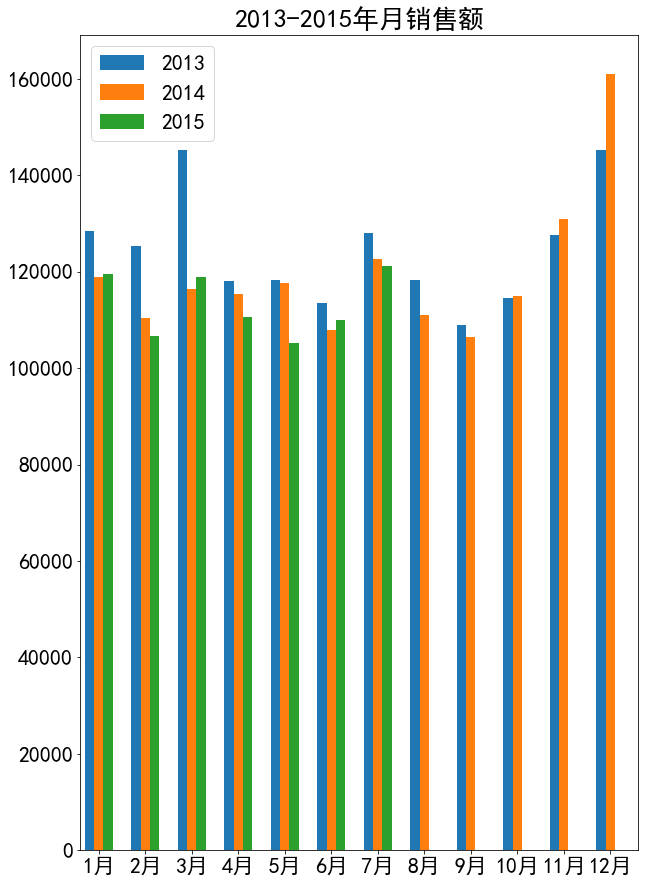

In [14]:


#解决中文乱码的问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['font.family']='sans-serif'
#解决负号'-'显示为方块的问题
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 22

#X=[0,1,2,3,4,5,6,7,8,9,10,11]
x_labels = ['1月','2月','3月','4月','5月','6月','7月','8月','9月','10月','11月','12月']
X = np.arange(12)
bar_width = 0.2
Y=[222,42,455,664,454,334,222,42,455,664,454,334]

fig = plt.figure(figsize=(10,15))
ax = plt.subplot()
bars = []
years = []
ij = 0
for i in month_info:
    ij = ij +1
    bar_i = ax.bar(X+bar_width*ij,month_info[i],bar_width)
    bars.append(bar_i)
    years.append(i)

#bar_1 = ax.bar(X+bar_width,month_info['2013'],bar_width)
#bar_2 = ax.bar(X+bar_width*2,month_info['2014'],bar_width)
#bar_3 = ax.bar(X+bar_width*3,month_info['2015'],bar_width)
ax.set_xticklabels(x_labels)
plt.xticks(X+bar_width*2)
plt.xlim(0,len(x_labels))
plt.title('2013-2015年月销售额')
handles, labels = ax.get_legend_handles_labels()

plt.legend(bars, years,loc = 'best')
#plt.set_xticks(x_labels)
#plt.savefig('./year_month.jpg')
plt.show()


In [15]:
#归一化处理
scaler = MinMaxScaler()
x = data_data['Customers'].values.reshape(-1,1)
data_data['Customers'] = scaler.fit_transform(x)
data_data.head(5)

d:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,month,day
0,1,5,5263,0.074119,1,1,0,1,2015,7,31
1,2,5,6064,0.083604,1,1,0,1,2015,7,31
2,3,5,8314,0.110163,1,1,0,1,2015,7,31
3,4,5,13995,0.201897,1,1,0,1,2015,7,31
4,5,5,4822,0.074661,1,1,0,1,2015,7,31


In [16]:
data_data = data_data.merge(data_store,left_on = 'Store',right_on = 'Store',how="left")
print(data_data.shape[0])
data_data.head(10)
#

844338


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,month,day,StoreType,Assortment,CompetitionDistance,Promo2
0,1,5,5263,0.074119,1,1,0,1,2015,7,31,3,1,0.016728,0
1,2,5,6064,0.083604,1,1,0,1,2015,7,31,1,1,0.007501,1
2,3,5,8314,0.110163,1,1,0,1,2015,7,31,1,1,0.186253,1
3,4,5,13995,0.201897,1,1,0,1,2015,7,31,3,3,0.008160,0
4,5,5,4822,0.074661,1,1,0,1,2015,7,31,1,1,0.394271,0
5,6,5,5651,0.078726,1,1,0,1,2015,7,31,1,1,0.004073,0
6,7,5,15344,0.190515,1,1,0,1,2015,7,31,1,3,0.316363,0
7,8,5,8492,0.111789,1,1,0,1,2015,7,31,1,1,0.099118,0
8,9,5,8565,0.092005,1,1,0,1,2015,7,31,1,3,0.026747,0
9,10,5,7185,0.091192,1,1,0,1,2015,7,31,1,1,0.041643,0


In [17]:
#test 数据获取open=1 的数据
print(data_test.shape[0])
data_test_noOpen = data_test.loc[(data_test['Open'] == 0)]
data_test_noPenIds = data_test_noOpen['Id']

data_test = data_test.loc[(data_test['Open'] == 1)]
data_test_ids = data_test['Id']
data_test.drop(['Id'],axis=1,inplace = True)
print(data_test.shape[0])
print(data_test_noOpen.shape[0])
print(data_test_noOpen)
#data=data_test[~((data_test['Open']==0)|(data_test['Open']==1))]
#print(data)

41088
35104
5984
          Id  Store  DayOfWeek  Open  Promo  StateHoliday  SchoolHoliday  \
543      544    703          4   0.0      1             0              0   
676      677    879          4   0.0      1             0              0   
840      841   1097          4   0.0      1             0              0   
1399    1400    703          3   0.0      1             0              0   
1532    1533    879          3   0.0      1             0              0   
1696    1697   1097          3   0.0      1             0              0   
2255    2256    703          2   0.0      1             0              0   
2388    2389    879          2   0.0      1             0              0   
2552    2553   1097          2   0.0      1             0              0   
3111    3112    703          1   0.0      1             0              0   
3244    3245    879          1   0.0      1             0              1   
3408    3409   1097          1   0.0      1             0              

In [18]:
data_test = data_test.merge(data_store,left_on = 'Store',right_on = 'Store',how="left")
print(data_test.shape[0])
data_test.head(10)

35104


,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,year,month,day,StoreType,Assortment,CompetitionDistance,Promo2
0,1,4,1.0,1,0,0,2015,9,17,3,1,0.016728,0
1,3,4,1.0,1,0,0,2015,9,17,1,1,0.186253,1
2,7,4,1.0,1,0,0,2015,9,17,1,3,0.316363,0
3,8,4,1.0,1,0,0,2015,9,17,1,1,0.099118,0
4,9,4,1.0,1,0,0,2015,9,17,1,3,0.026747,0
5,10,4,1.0,1,0,0,2015,9,17,1,1,0.041643,0
6,11,4,1.0,1,0,0,2015,9,17,1,3,0.012642,1
7,12,4,1.0,1,0,0,2015,9,17,1,3,0.014092,1
8,13,4,1.0,1,0,0,2015,9,17,4,1,0.004073,1
9,14,4,1.0,1,0,0,2015,9,17,1,1,0.017124,1


In [19]:
#test 

In [20]:
#dummies 独热编码
print(data_data.shape[0])
if 'StoreType_1'  not in data_data.columns:
    data_data = pd.get_dummies(data_data,columns=['StoreType','StateHoliday'])
    print(data_data.shape)
    print(data_data.columns.values)
    print(data_data.head(5))
    print("*************")
    print(data_test.shape[0])
    data_test = pd.get_dummies(data_test,columns=['StoreType','StateHoliday'])
    data_test['StateHoliday_2'] = 0
    data_test['StateHoliday_3'] = 0
    data_data.sort_index(axis=1,inplace=True)
    data_test.sort_index(axis=1,inplace=True)
    print(data_test.shape)
    print(data_test.columns.values)
    print(data_test.head(5))

844338
(844338, 21)
['Store' 'DayOfWeek' 'Sales' 'Customers' 'Open' 'Promo' 'SchoolHoliday'
 'year' 'month' 'day' 'Assortment' 'CompetitionDistance' 'Promo2'
 'StoreType_1' 'StoreType_2' 'StoreType_3' 'StoreType_4' 'StateHoliday_0'
 'StateHoliday_1' 'StateHoliday_2' 'StateHoliday_3']
   Store  DayOfWeek  Sales  Customers  Open  Promo  SchoolHoliday  year  \
0      1          5   5263   0.074119     1      1              1  2015   
1      2          5   6064   0.083604     1      1              1  2015   
2      3          5   8314   0.110163     1      1              1  2015   
3      4          5  13995   0.201897     1      1              1  2015   
4      5          5   4822   0.074661     1      1              1  2015   

   month  day       ...        CompetitionDistance  Promo2  StoreType_1  \
0      7   31       ...                   0.016728       0            0   
1      7   31       ...                   0.007501       1            1   
2      7   31       ...                

In [21]:

#duplicate_columns = data_data.columns[data_data.columns.duplicated()]
#print(duplicate_columns)
data_data.shape[0]

#print(type(data_data['stateHoliday'][63557]))
 

844338

In [22]:
import math
def rmspe_xgboost(preds, dtrain):       # written by myself
    labels = dtrain.get_label()
    # return a pair metric_name, result
    # since preds are margin(before logistic transformation, cutoff at 0)
    err = np.mean(((labels-preds)/labels)**2)
    return 'rmspe_xgboost',math.sqrt(err)

In [23]:
from math import sqrt
def rmspe(y,y_pre):
    print("y-y_pre/y",(y-y_pre)/y)
    print("(y-y_pre/y)**2",((y-y_pre)/y)**2)
    a = np.mean(((y-y_pre)/y)**2)
    return sqrt(a)
    #print('y:',y)
    #print('y_pre:',y_pre)
    #print("y/y_pre:",(y_pre / y - 1)**2)
    #print("mean:",np.mean((y_pre / y - 1)**2))
    #return np.sqrt(np.mean((y_pre / y - 1) ** 2))

In [24]:
'''
# 训练集和测试集随机划分
#train_data = data_data.drop(['Sales'],axis=1)
if 'Customers' in data_data.columns:
    data_data.drop(['Customers'],axis=1,inplace=True)
X_train, X_valid = train_test_split(data_data, test_size=0.2, random_state=10)
#print("+++++++++++++++++++++++++++++++++++")
#print(X_train)
#print(X_valid)
y_train = np.log1p(X_train.Sales)
y_valid = np.log1p(X_valid.Sales)
#y_train = X_train.Sales
#y_valid = X_valid.Sales

print(type(X_train.Sales))
print("x_TRAIN:",X_train.Sales.shape[0])
#X_train.drop(['Sales'],axis=1,inplace=True)
print("####################")
#print(type(X_train))
#print(type(y_train))
X_train.drop(['Sales'],axis=1,inplace=True)
X_valid.drop(['Sales'],axis=1,inplace=True)

dtrain = xgb.DMatrix(X_train,label=y_train)
dvalid = xgb.DMatrix(X_valid,label=y_valid)
print(X_train.shape[0])

print(type(y_train))
print("y_train:",y_train.shape[0])
#print(X_train.Sales.unique())
num_boost_round = 50
watch_list= [(dtrain, 'train'), (dvalid, 'valid')]
params = {"objective": "reg:linear","booster": "gbtree", "eta": 0.5,"max_depth": 10,"min_child_weight":5}
print("start train data by xgboost")
xgboost_model = xgb.train(params, dtrain, num_boost_round,evals=watch_list)
print("valid....")
y_pre = xgboost_model.predict(dvalid)


print(y_pre)
print(len(y_pre))
print(len(y_valid))
print(type(y_valid))
'''

'\n# 训练集和测试集随机划分\n#train_data = data_data.drop([\'Sales\'],axis=1)\nif \'Customers\' in data_data.columns:\n    data_data.drop([\'Customers\'],axis=1,inplace=True)\nX_train, X_valid = train_test_split(data_data, test_size=0.2, random_state=10)\n#print("+++++++++++++++++++++++++++++++++++")\n#print(X_train)\n#print(X_valid)\ny_train = np.log1p(X_train.Sales)\ny_valid = np.log1p(X_valid.Sales)\n#y_train = X_train.Sales\n#y_valid = X_valid.Sales\n\nprint(type(X_train.Sales))\nprint("x_TRAIN:",X_train.Sales.shape[0])\n#X_train.drop([\'Sales\'],axis=1,inplace=True)\nprint("####################")\n#print(type(X_train))\n#print(type(y_train))\nX_train.drop([\'Sales\'],axis=1,inplace=True)\nX_valid.drop([\'Sales\'],axis=1,inplace=True)\n\ndtrain = xgb.DMatrix(X_train,label=y_train)\ndvalid = xgb.DMatrix(X_valid,label=y_valid)\nprint(X_train.shape[0])\n\nprint(type(y_train))\nprint("y_train:",y_train.shape[0])\n#print(X_train.Sales.unique())\nnum_boost_round = 50\nwatch_list= [(dtrain, \'train\

In [25]:
# 训练集和测试集手动划分
if 'Customers' in data_data.columns:
    data_data.drop(['Customers'],axis=1,inplace=True)
X_train = data_data[0:813766]
X_valid = data_data[813766::]
#print(X_train)
#print("*********************")
#print(X_valid)
#X_train, X_valid = train_test_split(data_data, test_size=0.2, random_state=10)
#print("+++++++++++++++++++++++++++++++++++")
#print(X_train)
#print(X_valid)

y_train = np.log1p(X_train.Sales)
y_valid = np.log1p(X_valid.Sales)
#y_train = X_train.Sales
#y_valid = X_valid.Sales

print(type(X_train.Sales))
print("x_TRAIN:",X_train.Sales.shape[0])
#X_train.drop(['Sales'],axis=1,inplace=True)
print("####################")
#print(type(X_train))
#print(type(y_train))
X_valid_sales =X_valid['Sales'] 
X_train.drop(['Sales'],axis=1,inplace=True)
X_valid.drop(['Sales'],axis=1,inplace=True)

dtrain = xgb.DMatrix(X_train,label=y_train)
dvalid = xgb.DMatrix(X_valid,label=y_valid)
print(X_train.shape[0])

print(type(y_train))
print("y_train:",y_train.shape[0])
print("***********************************")
print(X_valid.shape[0])
#print(X_train.Sales.unique())


<class 'pandas.core.series.Series'>
x_TRAIN: 813766
####################


d:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


813766
<class 'pandas.core.series.Series'>
y_train: 813766
***********************************
30572


In [26]:
#************** 训练得分的读写 ***********************
import json
def write_record(data,file):
    jsObj = json.dumps(data)
    fileObject = open(file, 'w')
    fileObject.write(jsObj)
    fileObject.close()

# 读log 记录
def read_record(file):
    fileObject = open(file, 'r')
    file_txt = fileObject.read()
    json_content = json.loads(file_txt)
    return json_content

In [ ]:
#********************开始训练***************************
num_boost_round = 25000
min_child_weight = 5
max_depth=10
eta = 0.01
watch_list= [(dtrain, 'train'), (dvalid, 'valid')]
evals_result = dict()
params = {"objective": "reg:linear","booster": "gbtree", "eta": eta,"max_depth":max_depth,"min_child_weight":min_child_weight} #"min_child_weight":5
print("start train data by xgboost")
xgboost_model = xgb.train(params, dtrain, num_boost_round,feval=rmspe_xgboost,evals=watch_list,verbose_eval=10,early_stopping_rounds=500,evals_result=evals_result)
print("valid....")
#保存模型
model_name = "model/num"+str(num_boost_round)+"_weight"+str(min_child_weight)+"_maxdepth"+str(max_depth)+"_eta"+str(eta)+".model"
log_name= "record/num"+str(num_boost_round)+"_weight"+str(min_child_weight)+"_maxdepth"+str(max_depth)+"_eta"+str(eta)+".txt"
xgboost_model.save_model(model_name)
print("save...",model_name)
write_record(evals_result,log_name)
print(".....save log ..........",log_name)


start train data by xgboost
[16:54:04] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=6
[0]	train-rmse:8.23144	valid-rmse:8.11903	train-rmspe_xgboost:0.938081	valid-rmspe_xgboost:0.937286
Multiple eval metrics have been passed: 'valid-rmspe_xgboost' will be used for early stopping.

Will train until valid-rmspe_xgboost hasn't improved in 500 rounds.
[16:54:04] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=6
[16:54:05] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 0 pruned nodes, max_depth=6
[16:54:05] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 0 pruned nodes, max_depth=6
[16:54:05] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 0 prun

[16:54:21] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max_depth=6
[16:54:22] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 0 pruned nodes, max_depth=6
[16:54:22] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 0 pruned nodes, max_depth=6
[16:54:22] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 0 pruned nodes, max_depth=6
[16:54:23] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 0 pruned nodes, max_depth=6
[16:54:23] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 0 pruned nodes, max_depth=6
[16:54:23] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 0 prun

[16:54:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 0 pruned nodes, max_depth=6
[16:54:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 0 pruned nodes, max_depth=6
[16:54:40] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 0 pruned nodes, max_depth=6
[16:54:40] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 0 pruned nodes, max_depth=6
[16:54:40] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 0 pruned nodes, max_depth=6
[16:54:40] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 0 pruned nodes, max_depth=6
[16:54:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 0 pr

[16:54:56] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 0 pruned nodes, max_depth=6
[16:54:57] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 0 pruned nodes, max_depth=6
[16:54:57] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 0 pruned nodes, max_depth=6
[16:54:57] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 0 pruned nodes, max_depth=6
[160]	train-rmse:3.70468	valid-rmse:3.61858	train-rmspe_xgboost:0.420406	valid-rmspe_xgboost:0.415652
[16:54:58] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, max_depth=6
[16:54:58] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 0 pruned nodes, max_depth=6
[16:54:58] d:\build\

[16:55:14] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 0 pruned nodes, max_depth=6
[210]	train-rmse:2.89154	valid-rmse:2.81207	train-rmspe_xgboost:0.327445	valid-rmspe_xgboost:0.322213
[16:55:14] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=6
[16:55:15] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 0 pruned nodes, max_depth=6
[16:55:15] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 0 pruned nodes, max_depth=6
[16:55:15] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned nodes, max_depth=6
[16:55:16] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max_depth=6
[16:55:16] d:\build

[16:55:31] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=6
[16:55:31] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 0 pruned nodes, max_depth=6
[16:55:32] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, max_depth=6
[16:55:32] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=6
[16:55:32] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max_depth=6
[16:55:33] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=6
[16:55:33] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0

[16:55:49] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 0 pruned nodes, max_depth=6
[16:55:49] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 0 pruned nodes, max_depth=6
[16:55:50] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 0 pruned nodes, max_depth=6
[16:55:50] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=6
[16:55:50] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, max_depth=6
[16:55:51] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=6
[320]	train-rmse:1.68894	valid-rmse:1.62418	train-rmspe_xgboost:0.190032	valid-rmspe_xgboost:0.184697
[16:55:51] d:\bu

[16:56:06] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 0 pruned nodes, max_depth=6
[16:56:07] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 0 pruned nodes, max_depth=6
[16:56:07] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned nodes, max_depth=6
[370]	train-rmse:1.33127	valid-rmse:1.27332	train-rmspe_xgboost:0.149214	valid-rmspe_xgboost:0.144161
[16:56:07] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 0 pruned nodes, max_depth=6
[16:56:08] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 0 pruned nodes, max_depth=6
[16:56:09] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=6
[16:56:09] d:\bu

[16:56:25] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=6
[16:56:25] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, max_depth=6
[16:56:25] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[16:56:26] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=6
[16:56:26] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 0 pruned nodes, max_depth=6
[16:56:26] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[16:56:27] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes,

[16:56:42] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[16:56:42] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 0 pruned nodes, max_depth=6
[16:56:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[16:56:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, max_depth=6
[16:56:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, max_depth=6
[16:56:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned nodes, max_depth=6
[16:56:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes,

[16:57:00] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[16:57:00] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[16:57:00] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=6
[16:57:01] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=6
[530]	train-rmse:0.664924	valid-rmse:0.629134	train-rmspe_xgboost:0.073536	valid-rmspe_xgboost:0.07034
[16:57:01] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=6
[16:57:01] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 0 pruned nodes, max_depth=6
[16:57:02] d:\b

[16:57:18] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 0 pruned nodes, max_depth=6
[580]	train-rmse:0.555486	valid-rmse:0.528992	train-rmspe_xgboost:0.061289	valid-rmspe_xgboost:0.059163
[16:57:18] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=6
[16:57:18] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=6
[16:57:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=6
[16:57:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[16:57:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[16:57:20] d:\

[16:57:35] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[16:57:36] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=6
[16:57:36] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[16:57:36] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=6
[16:57:37] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[16:57:37] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=6
[16:57:37] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes,

[16:57:55] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=6
[16:57:55] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[16:57:56] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[16:57:56] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=6
[16:57:56] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=6
[16:57:57] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[690]	train-rmse:0.411611	valid-rmse:0.405581	train-rmspe_xgboost:0.045574	valid-rmspe_xgboost:0.045968
[16:57:57] d:\

[16:58:13] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[16:58:13] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[16:58:13] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=6
[740]	train-rmse:0.37632	valid-rmse:0.378301	train-rmspe_xgboost:0.041887	valid-rmspe_xgboost:0.043283
[16:58:14] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[16:58:14] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[16:58:14] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=6
[16:58:15] d:\b

[16:58:31] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[16:58:31] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[16:58:31] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 0 pruned nodes, max_depth=6
[16:58:32] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 0 pruned nodes, max_depth=6
[16:58:32] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[16:58:33] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[16:58:33] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes,

[16:58:49] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 0 pruned nodes, max_depth=6
[16:58:49] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned nodes, max_depth=6
[16:58:50] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=6
[16:58:50] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[16:58:50] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 0 pruned nodes, max_depth=6
[16:58:51] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=6
[16:58:52] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes,

[16:59:09] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 0 pruned nodes, max_depth=6
[16:59:09] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[16:59:09] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[16:59:10] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 0 pruned nodes, max_depth=6
[900]	train-rmse:0.32441	valid-rmse:0.343319	train-rmspe_xgboost:0.036835	valid-rmspe_xgboost:0.040294
[16:59:10] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[16:59:10] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[16:59:11] d:\b

[16:59:26] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=6
[950]	train-rmse:0.317262	valid-rmse:0.33928	train-rmspe_xgboost:0.036204	valid-rmspe_xgboost:0.040026
[16:59:27] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 0 pruned nodes, max_depth=6
[16:59:27] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[16:59:27] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned nodes, max_depth=6
[16:59:28] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[16:59:28] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 0 pruned nodes, max_depth=6
[16:59:28] d:\b

[16:59:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=6
[16:59:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[16:59:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[16:59:45] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned nodes, max_depth=6
[16:59:45] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[16:59:45] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[16:59:46] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes,

[17:00:03] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[17:00:03] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[17:00:04] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=6
[17:00:04] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[17:00:04] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:00:05] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=6
[1060]	train-rmse:0.30772	valid-rmse:0.334054	train-rmspe_xgboost:0.035392	valid-rmspe_xgboost:0.039704
[17:00:05] d:\

[17:00:21] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[17:00:21] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=6
[17:00:21] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned nodes, max_depth=6
[1110]	train-rmse:0.305259	valid-rmse:0.332721	train-rmspe_xgboost:0.035194	valid-rmspe_xgboost:0.039628
[17:00:22] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned nodes, max_depth=6
[17:00:22] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=6
[17:00:22] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:00:23] d:

[17:00:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=6
[17:00:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 0 pruned nodes, max_depth=6
[17:00:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=6
[17:00:40] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=6
[17:00:40] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=6
[17:00:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned nodes, max_depth=6
[17:00:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes,

[17:00:59] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:00:59] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=6
[17:01:00] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[17:01:00] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=6
[17:01:00] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:01:00] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:01:01] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes,

[17:01:17] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[17:01:17] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=6
[17:01:17] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=6
[17:01:18] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[1270]	train-rmse:0.29794	valid-rmse:0.327783	train-rmspe_xgboost:0.034516	valid-rmspe_xgboost:0.039205
[17:01:18] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=6
[17:01:18] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:01:19] d:\

[17:01:35] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=6
[1320]	train-rmse:0.295774	valid-rmse:0.326038	train-rmspe_xgboost:0.034297	valid-rmspe_xgboost:0.039027
[17:01:35] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=6
[17:01:35] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=6
[17:01:35] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[17:01:36] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=6
[17:01:36] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=6
[17:01:36] d:

[17:01:54] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=6
[17:01:54] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[17:01:54] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:01:55] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:01:55] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=6
[17:01:55] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=6
[17:01:56] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes,

[17:02:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=6
[17:02:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=6
[17:02:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[17:02:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 0 pruned nodes, max_depth=6
[17:02:13] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:02:13] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=6
[1430]	train-rmse:0.290292	valid-rmse:0.321243	train-rmspe_xgboost:0.033713	valid-rmspe_xgboost:0.0385
[17:02:13] d:\b

[17:02:29] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned nodes, max_depth=6
[17:02:30] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[17:02:30] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=6
[1480]	train-rmse:0.288105	valid-rmse:0.319227	train-rmspe_xgboost:0.033475	valid-rmspe_xgboost:0.038271
[17:02:30] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:02:31] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=6
[17:02:31] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:02:31] d:

[17:02:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=6
[17:02:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=6
[17:02:48] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=6
[17:02:49] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:02:49] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=6
[17:02:49] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:02:50] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes,

[17:03:08] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=6
[17:03:08] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=6
[17:03:08] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=6
[17:03:09] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=6
[17:03:09] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=6
[17:03:09] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:03:09] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes,

[17:03:27] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=6
[17:03:27] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[17:03:28] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=6
[17:03:28] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[1640]	train-rmse:0.282221	valid-rmse:0.313785	train-rmspe_xgboost:0.03282	valid-rmspe_xgboost:0.037642
[17:03:28] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:03:29] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=6
[17:03:29] d:\

[17:03:45] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[1690]	train-rmse:0.280403	valid-rmse:0.312056	train-rmspe_xgboost:0.032614	valid-rmspe_xgboost:0.037441
[17:03:45] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=6
[17:03:46] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=6
[17:03:46] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=6
[17:03:46] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:03:46] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=6
[17:03:47] d:

[17:04:04] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=6
[17:04:04] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=6
[17:04:04] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:04:05] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=6
[17:04:05] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=6
[17:04:05] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=6
[17:04:06] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes,

[17:04:21] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=6
[17:04:22] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[17:04:22] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=6
[17:04:22] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned nodes, max_depth=6
[17:04:23] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=6
[17:04:23] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=6
[1800]	train-rmse:0.276295	valid-rmse:0.308005	train-rmspe_xgboost:0.032149	valid-rmspe_xgboost:0.036962
[17:04:23] d:

[17:04:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 0 pruned nodes, max_depth=6
[17:04:40] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[17:04:40] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=6
[1850]	train-rmse:0.274633	valid-rmse:0.306361	train-rmspe_xgboost:0.03196	valid-rmspe_xgboost:0.036765
[17:04:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=6
[17:04:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[17:04:42] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=6
[17:04:42] d:\b

[17:05:00] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 0 pruned nodes, max_depth=6
[17:05:00] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=6
[17:05:00] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=6
[17:05:01] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=6
[17:05:01] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:05:01] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=6
[17:05:02] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 

[17:05:17] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned nodes, max_depth=6
[17:05:18] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:05:18] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=6
[17:05:18] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=6
[17:05:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[17:05:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[17:05:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes,

[17:05:35] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned nodes, max_depth=6
[17:05:36] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[17:05:36] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=6
[17:05:36] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=6
[2010]	train-rmse:0.269112	valid-rmse:0.30104	train-rmspe_xgboost:0.031333	valid-rmspe_xgboost:0.036147
[17:05:36] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[17:05:37] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 0 pruned nodes, max_depth=6
[17:05:37] d:\

[17:05:55] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[2060]	train-rmse:0.267486	valid-rmse:0.299488	train-rmspe_xgboost:0.031147	valid-rmspe_xgboost:0.035965
[17:05:55] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=6
[17:05:56] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=6
[17:05:56] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 0 pruned nodes, max_depth=6
[17:05:56] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=6
[17:05:56] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=6
[17:05:57] d:

[17:06:13] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned nodes, max_depth=6
[17:06:13] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[17:06:13] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 0 pruned nodes, max_depth=6
[17:06:14] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[17:06:14] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:06:14] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=6
[17:06:14] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes,

[17:06:31] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:06:31] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=6
[17:06:31] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned nodes, max_depth=6
[17:06:32] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=6
[17:06:32] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=6
[17:06:33] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[2170]	train-rmse:0.263891	valid-rmse:0.295977	train-rmspe_xgboost:0.030738	valid-rmspe_xgboost:0.035553
[17:06:33] d:

[17:06:49] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[17:06:50] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[17:06:50] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=6
[2220]	train-rmse:0.26236	valid-rmse:0.294483	train-rmspe_xgboost:0.030564	valid-rmspe_xgboost:0.035379
[17:06:50] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=6
[17:06:51] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:06:51] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=6
[17:06:51] d:\

[17:07:09] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=6
[17:07:10] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:07:10] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, max_depth=6
[17:07:10] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 0 pruned nodes, max_depth=6
[17:07:10] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:07:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 0 pruned nodes, max_depth=6
[17:07:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes,

[17:07:27] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[17:07:28] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[17:07:28] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:07:28] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=6
[17:07:29] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 0 pruned nodes, max_depth=6
[17:07:29] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=6
[17:07:29] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes,

[17:07:46] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[17:07:46] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[17:07:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:07:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 0 pruned nodes, max_depth=6
[2380]	train-rmse:0.25782	valid-rmse:0.290003	train-rmspe_xgboost:0.030043	valid-rmspe_xgboost:0.034852
[17:07:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:07:48] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[17:07:48] d:\

[17:08:06] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[2430]	train-rmse:0.256314	valid-rmse:0.288589	train-rmspe_xgboost:0.02987	valid-rmspe_xgboost:0.034686
[17:08:06] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=6
[17:08:06] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[17:08:07] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[17:08:07] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=6
[17:08:07] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:08:08] d:\

[17:08:24] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=6
[17:08:24] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=6
[17:08:25] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=6
[17:08:25] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:08:26] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 0 pruned nodes, max_depth=6
[17:08:26] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:08:26] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 

[17:08:42] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:08:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[17:08:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[17:08:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:08:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=6
[17:08:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 0 pruned nodes, max_depth=6
[2540]	train-rmse:0.252976	valid-rmse:0.285316	train-rmspe_xgboost:0.029487	valid-rmspe_xgboost:0.034302
[17:08:44] d:

[17:09:01] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=6
[17:09:02] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[17:09:02] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[2590]	train-rmse:0.251401	valid-rmse:0.283723	train-rmspe_xgboost:0.029306	valid-rmspe_xgboost:0.034116
[17:09:02] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[17:09:03] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 96 extra nodes, 0 pruned nodes, max_depth=6
[17:09:03] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[17:09:03] d:\

[17:09:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:09:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=6
[17:09:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:09:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=6
[17:09:21] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[17:09:21] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[17:09:21] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes,

[17:09:37] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=6
[17:09:38] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:09:38] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=6
[17:09:38] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[17:09:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:09:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[17:09:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes,

[17:09:57] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[17:09:57] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:09:57] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[17:09:57] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=6
[2750]	train-rmse:0.246531	valid-rmse:0.279059	train-rmspe_xgboost:0.02874	valid-rmspe_xgboost:0.03356
[17:09:58] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=6
[17:09:58] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[17:09:58] d:\b

[17:10:14] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[2800]	train-rmse:0.245569	valid-rmse:0.278096	train-rmspe_xgboost:0.028629	valid-rmspe_xgboost:0.033444
[17:10:15] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:10:15] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[17:10:15] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=6
[17:10:16] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[17:10:16] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=6
[17:10:17] d:

[17:10:32] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=6
[17:10:33] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[17:10:33] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=6
[17:10:34] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=6
[17:10:34] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[17:10:34] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=6
[17:10:35] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 94 extra nodes, 

[17:10:51] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:10:51] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:10:52] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[17:10:52] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned nodes, max_depth=6
[17:10:52] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[17:10:53] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 96 extra nodes, 0 pruned nodes, max_depth=6
[2910]	train-rmse:0.242101	valid-rmse:0.274821	train-rmspe_xgboost:0.028228	valid-rmspe_xgboost:0.033056
[17:10:53] d:\

[17:11:10] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=6
[17:11:10] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[17:11:10] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 96 extra nodes, 0 pruned nodes, max_depth=6
[2960]	train-rmse:0.240128	valid-rmse:0.273061	train-rmspe_xgboost:0.027998	valid-rmspe_xgboost:0.032847
[17:11:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=6
[17:11:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[17:11:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=6
[17:11:12] d:\

[17:11:27] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 96 extra nodes, 0 pruned nodes, max_depth=6
[17:11:28] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:11:28] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=6
[17:11:28] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[17:11:29] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:11:29] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[17:11:29] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 

[17:11:45] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[17:11:46] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=6
[17:11:46] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes, max_depth=6
[17:11:46] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[17:11:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes, max_depth=6
[17:11:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[17:11:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0

[17:12:04] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[17:12:04] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[17:12:04] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=6
[17:12:05] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=6
[3120]	train-rmse:0.235246	valid-rmse:0.268555	train-rmspe_xgboost:0.027433	valid-rmspe_xgboost:0.032317
[17:12:05] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[17:12:05] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=6
[17:12:06] d:

[17:12:22] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[3170]	train-rmse:0.234004	valid-rmse:0.267412	train-rmspe_xgboost:0.02729	valid-rmspe_xgboost:0.032183
[17:12:22] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[17:12:22] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=6
[17:12:23] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:12:23] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[17:12:23] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=6
[17:12:23] d:\

[17:12:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned nodes, max_depth=6
[17:12:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[17:12:40] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=6
[17:12:40] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[17:12:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=6
[17:12:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[17:12:42] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes,

[17:12:58] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:12:59] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[17:12:59] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=6
[17:12:59] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[17:13:00] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=6
[17:13:00] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=6
[3280]	train-rmse:0.23157	valid-rmse:0.26508	train-rmspe_xgboost:0.027006	valid-rmspe_xgboost:0.031903
[17:13:00] d:\b

[17:13:16] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[17:13:17] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 96 extra nodes, 0 pruned nodes, max_depth=6
[17:13:17] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=6
[3330]	train-rmse:0.229894	valid-rmse:0.263473	train-rmspe_xgboost:0.026813	valid-rmspe_xgboost:0.031715
[17:13:17] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[17:13:18] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=6
[17:13:18] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=6
[17:13:18] d:\

[17:13:34] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[17:13:34] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:13:35] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:13:35] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:13:35] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[17:13:36] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[17:13:36] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes,

[17:13:52] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:13:52] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:13:53] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[17:13:53] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:13:54] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=6
[17:13:54] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[17:13:55] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes,

[17:14:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[17:14:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:14:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned nodes, max_depth=6
[17:14:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[3490]	train-rmse:0.225582	valid-rmse:0.259335	train-rmspe_xgboost:0.026318	valid-rmspe_xgboost:0.031232
[17:14:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[17:14:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:14:13] d:

[17:14:29] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[3540]	train-rmse:0.224209	valid-rmse:0.258083	train-rmspe_xgboost:0.02616	valid-rmspe_xgboost:0.031084
[17:14:29] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:14:29] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[17:14:30] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=6
[17:14:30] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:14:30] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[17:14:31] d:\

[17:14:46] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[17:14:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:14:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[17:14:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:14:48] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned nodes, max_depth=6
[17:14:48] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[17:14:49] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes,

[17:15:06] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[17:15:06] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:15:07] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:15:07] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:15:07] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=6
[17:15:08] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[3650]	train-rmse:0.221877	valid-rmse:0.255896	train-rmspe_xgboost:0.025895	valid-rmspe_xgboost:0.030827
[17:15:08] d:

[17:15:24] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[17:15:25] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=6
[17:15:25] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[3700]	train-rmse:0.220741	valid-rmse:0.254828	train-rmspe_xgboost:0.025764	valid-rmspe_xgboost:0.030701
[17:15:25] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:15:26] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[17:15:26] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[17:15:26] d:

[17:15:42] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:15:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:15:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[17:15:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:15:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:15:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[17:15:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes,

[17:16:02] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:16:02] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:16:02] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[17:16:03] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:16:03] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[17:16:03] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[17:16:04] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes,

[17:16:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:16:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:16:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:16:21] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[3860]	train-rmse:0.217217	valid-rmse:0.251649	train-rmspe_xgboost:0.02536	valid-rmspe_xgboost:0.030326
[17:16:21] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[17:16:21] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:16:22] d:\

[17:16:37] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[3910]	train-rmse:0.216228	valid-rmse:0.250756	train-rmspe_xgboost:0.025247	valid-rmspe_xgboost:0.03022
[17:16:38] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[17:16:38] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:16:38] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[17:16:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[17:16:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=6
[17:16:39] d:\

[17:16:56] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[17:16:56] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned nodes, max_depth=6
[17:16:57] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[17:16:57] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:16:58] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=6
[17:16:58] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=6
[17:16:58] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes,

[17:17:14] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned nodes, max_depth=6
[17:17:14] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=6
[17:17:15] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:17:15] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:17:15] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:17:16] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[4020]	train-rmse:0.214144	valid-rmse:0.248861	train-rmspe_xgboost:0.025008	valid-rmspe_xgboost:0.029994
[17:17:16] d:

[17:17:31] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=6
[17:17:32] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:17:32] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=6
[4070]	train-rmse:0.213171	valid-rmse:0.248007	train-rmspe_xgboost:0.024895	valid-rmspe_xgboost:0.029892
[17:17:32] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[17:17:33] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[17:17:33] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:17:33] d:

[17:17:49] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[17:17:49] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:17:49] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:17:50] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[17:17:50] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:17:50] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[17:17:51] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes,

[17:18:07] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:18:08] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=6
[17:18:08] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 0 pruned nodes, max_depth=6
[17:18:08] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:18:09] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[17:18:09] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:18:09] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0

[17:18:25] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max_depth=6
[17:18:25] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[17:18:25] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[17:18:26] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=6
[4230]	train-rmse:0.209597	valid-rmse:0.244814	train-rmspe_xgboost:0.024487	valid-rmspe_xgboost:0.029516
[17:18:26] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned nodes, max_depth=6
[17:18:26] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[17:18:27] d:\

[17:18:42] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=6
[4280]	train-rmse:0.208617	valid-rmse:0.243935	train-rmspe_xgboost:0.024375	valid-rmspe_xgboost:0.029412
[17:18:42] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[17:18:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[17:18:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, max_depth=6
[17:18:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned nodes, max_depth=6
[17:18:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, max_depth=6
[17:18:44] d:

[17:19:00] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[17:19:01] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[17:19:01] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[17:19:01] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:19:02] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:19:02] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:19:02] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes,

[17:19:18] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[17:19:18] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 0 pruned nodes, max_depth=6
[17:19:18] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:19:18] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[17:19:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[17:19:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[4390]	train-rmse:0.206061	valid-rmse:0.241501	train-rmspe_xgboost:0.024082	valid-rmspe_xgboost:0.029125
[17:19:19] d:\

[17:19:35] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[17:19:35] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:19:36] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[4440]	train-rmse:0.204968	valid-rmse:0.24043	train-rmspe_xgboost:0.023957	valid-rmspe_xgboost:0.029001
[17:19:36] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[17:19:36] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[17:19:37] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[17:19:37] d:\

[17:19:52] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:19:53] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[17:19:53] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:19:55] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:19:55] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[17:19:56] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=6
[17:19:56] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes,

[17:20:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[17:20:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 0 pruned nodes, max_depth=6
[17:20:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[17:20:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[17:20:13] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=6
[17:20:13] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[17:20:13] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 

[17:20:29] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[17:20:29] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[17:20:29] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[17:20:30] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[4600]	train-rmse:0.202014	valid-rmse:0.237775	train-rmspe_xgboost:0.023616	valid-rmspe_xgboost:0.028686
[17:20:30] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[17:20:30] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[17:20:31] d:

[17:20:46] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[4650]	train-rmse:0.201145	valid-rmse:0.236982	train-rmspe_xgboost:0.023516	valid-rmspe_xgboost:0.028594
[17:20:46] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 94 extra nodes, 0 pruned nodes, max_depth=6
[17:20:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 0 pruned nodes, max_depth=6
[17:20:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[17:20:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:20:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[17:20:48] d:\

[17:21:04] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[17:21:04] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:21:05] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned nodes, max_depth=6
[17:21:05] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 0 pruned nodes, max_depth=6
[17:21:05] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[17:21:06] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 0 pruned nodes, max_depth=6
[17:21:06] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 

[17:21:22] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 0 pruned nodes, max_depth=6
[17:21:22] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:21:22] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 0 pruned nodes, max_depth=6
[17:21:23] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:21:23] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned nodes, max_depth=6
[17:21:23] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 0 pruned nodes, max_depth=6
[4760]	train-rmse:0.199066	valid-rmse:0.23509	train-rmspe_xgboost:0.023275	valid-rmspe_xgboost:0.02837
[17:21:24] d:\bui

[17:21:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 0 pruned nodes, max_depth=6
[17:21:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:21:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[4810]	train-rmse:0.198254	valid-rmse:0.234367	train-rmspe_xgboost:0.023181	valid-rmspe_xgboost:0.028284
[17:21:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=6
[17:21:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned nodes, max_depth=6
[17:21:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 0 pruned nodes, max_depth=6
[17:21:46] d:

In [ ]:
#查看loss 记录
train_log = evals_result['train']
valid_log = evals_result['valid']
show_num = 1200
if(show_num >0):
    log_index = np.arange(show_num)#len(train_log['rmspe_xgboost'])

    plt.plot(log_index,train_log['rmspe_xgboost'][0:show_num],linewidth = 1,label = 'train_rmspe')
    plt.legend()
    plt.plot(log_index,valid_log['rmspe_xgboost'][0:show_num],linewidth = 1,label = 'valid_rmspe')
    plt.legend()
else:
    log_index = np.arange(len(train_log['rmspe_xgboost']))
    plt.plot(log_index,train_log['rmspe_xgboost'],linewidth = 1,label = 'train_rmspe')
    plt.legend()
    plt.plot(log_index,valid_log['rmspe_xgboost'],linewidth = 1,label = 'valid_rmspe')
    plt.legend()
    
    

In [ ]:
print("best best_ntree_limit",xgboost_model.best_ntree_limit)
print("best_score:",xgboost_model.best_score)
print("bst.best_iteration",xgboost_model.best_iteration)



In [ ]:
#lightgbm
'''
if 'Customers' in data_data.columns:
    data_data.drop(['Customers'],axis=1,inplace=True)
X_train = data_data[0:813766]
X_valid = data_data[813766::]

y_train = np.log1p(X_train.Sales)
y_valid = np.log1p(X_valid.Sales)

X_valid_sales =X_valid['Sales'] 
X_train.drop(['Sales'],axis=1,inplace=True)
X_valid.drop(['Sales'],axis=1,inplace=True)

lgb_train = lgb.Dataset(X_train,y_train)
lgb_eval = lgb.Dataset(X_valid,y_valid,reference=lgb_train)

num_boost_round = 100
params = {
    'task':'train',
    'boosting_type':'gbdt',
    'objective':'regression',
    'metric':{'l2','mae'},
    'num_leaves':31,
    'learning_rate':0.2,
    'feature_fraction':0.9,
    'bagging_fraction':0.8,
    'bagging_freq':5,
    'verbose':0,
    'max_depth':10
}

gbm = lgb.train(params,lgb_train,num_boost_round=num_boost_round,valid_sets=lgb_eval,early_stopping_rounds=5)
 
y_pre = gbm.predict(X_valid,num_iteration=gbm.best_iteration)
#print(mean_squared_error(y_valid,lgb_predit) ** 0.5)
print("............... valid ...................")
print(y_pre)
'''


In [ ]:
#预测数据
#model_name="model/num20000_weight3_maxdepth6_eta0.01.model"
print(model_name)
xgboost_model = xgb.Booster(model_file=model_name)
y_pre = xgboost_model.predict(dvalid)


print(y_pre)
print('y_pre',len(y_pre))
print(len(y_valid))
print('X_valid_sales',len(X_valid_sales))
print(type(y_valid))

#load_model = booster.load_model('model/num20_w3_eta001.model')
#error = rmspe(np.expm1(y_valid.values), np.expm1(y_pre))
error = rmspe(np.expm1(y_valid.values),np.expm1(y_pre))
#print(type(np.expm1(y_pre)))
#print(type(y_valid.values))
print("*********************")
print((y_pre))
#print("pre:",y_pre)
print("valid_value:",y_valid.values)
#print(error)
print('RMSPE: {:.6f}'.format(error))

In [ ]:
''' 

#lightgbm 整合预测数据
print("********************* test ***************************")
y_test =  gbm.predict(data_test,num_iteration=gbm.best_iteration)
y_test = np.expm1(y_test)
print(y_test)
noOpen_nums = data_test_noPenIds.shape[0]
test_noOpen_data = np.zeros(noOpen_nums)

result_noOpen={'Id':data_test_noPenIds,'Sales':test_noOpen_data}
result_noOpen = pd.DataFrame(result_noOpen)
print(result_noOpen['Sales'])
print("&&&&&&&&&&&&&&&&&&&&&&&")
print(data_test_noPenIds.shape)
print(result_noOpen)

result={'Id':data_test_ids,'Sales':y_test}
print(type(result))
result = pd.DataFrame(result)
print(result)

#数据整合
result_total = result.append(result_noOpen)
print(result_total.shape)
print(result_total)
print("%%%%%%%%%%%%%%%%%%")
result_total.sort_values(by = 'Id',axis = 0,ascending = True,inplace=True)

result_total.to_csv ("data/result_light.csv" , encoding = "utf-8",index=False)
print(result_total.index)
'''

In [ ]:
'''
learn_model = xgb.cv(params, dtrain, 1500,feval=rmspe_xgboost,verbose_eval=10)
print("sss")
'''

In [ ]:
'''
#print(learn_model)
learn_model.loc[30:,["test-rmspe_xgboost-mean", "train-rmspe_xgboost-mean"]].plot()
print('y_pre',len(y_pre))
print(len(y_valid))
print('X_valid_sales',len(X_valid_sales))
'''

In [ ]:
#特征重要性
import operator
importance = xgboost_model.get_fscore()
importance = sorted(importance.items(), key=operator.itemgetter(1))
df = pd.DataFrame(importance, columns=['feature', 'fscore'])
df['fscore'] = df['fscore'] / df['fscore'].sum()

plt.figure()
df.plot()
df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(16, 10))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')

plt.show()



In [ ]:
#测试数据集预测
#dtest_ids = data_test['Id']
#data_test.drop(['Id'],axis=1,inplace=True)
dtest = xgb.DMatrix(data_test)
print(data_test.shape)
#data_test_s0 = data_test['SchoolHoliday_0']
#data_test_s1 = data_test['SchoolHoliday_1']
#data_test.drop('SchoolHoliday_0',axis=1,inplace=True)
#data_test.drop('SchoolHoliday_1',axis=1,inplace=True)
#data_test.insert(18,'SchoolHoliday_0',data_test_s0)
#data_test.insert(19,'SchoolHoliday_1',data_test_s1)

print(data_test.columns.values)
print("%%%%%%%%%%%%%%%%%%%")
print(X_train.shape)
print(X_train.columns.values)
y_test = xgboost_model.predict(dtest)


y_test = np.expm1(y_test)
print(y_test)

print('y_pre',y_pre.shape)
print(len(y_valid))
print('X_valid_sales',X_valid_sales.shape)



In [ ]:
print('y_pre',y_pre.shape)
print(len(y_valid))
print('X_valid_sales',X_valid_sales.shape)


In [ ]:
result={'Id':data_test_ids,'Sales':y_test}
print(type(result))
result = pd.DataFrame(result)
print(result)


In [ ]:
#处理open=0 的数据
print(result.loc[(result['Id']==544)])
print("******************************")
noOpen_nums = data_test_noPenIds.shape[0]
test_noOpen_data = np.zeros(noOpen_nums)

result_noOpen={'Id':data_test_noPenIds,'Sales':test_noOpen_data}
result_noOpen = pd.DataFrame(result_noOpen)
print(result_noOpen['Sales'])
print("&&&&&&&&&&&&&&&&&&&&&&&")
print(data_test_noPenIds.shape)
print(result_noOpen)


In [ ]:
result_total = result.append(result_noOpen)
print(result_total.shape)
print(result_total)
print("%%%%%%%%%%%%%%%%%%")
result_total.sort_values(by = 'Id',axis = 0,ascending = True,inplace=True)

result_total.to_csv ("data/result.csv" , encoding = "utf-8",index=False)
print(result_total.index)

In [ ]:
#print(result.loc[(result['Id']==41088)])

In [ ]:
#从验证集合
import random
#print(type(X_valid_sales))
random_i = random.randint(0,150)
data_size = 200
print("random_i",random_i)
print(X_valid_sales.shape)
print(y_pre.shape)
print(np.expm1(y_pre[random_i*data_size:(random_i+1)*data_size]))
#print(y_valid[random_i*data_size:(random_i+1)*data_size])
fig = plt.figure(figsize=(20,8))
x_index = np.arange(200)
print(x_index)
plt.plot(x_index,X_valid_sales[random_i*data_size:(random_i+1)*data_size],linewidth = 1,label = 'valid_label')
plt.legend()
plt.plot(x_index,np.expm1(y_pre[random_i*data_size:(random_i+1)*data_size]),linewidth = 1,label = 'valid_predict')
plt.legend()
plt.title('随机获取200条记录验证集预测情况')
plt.xlabel('数据ID')
plt.ylabel('销售额')
plt.savefig('predict_1.jpg')

In [ ]:
#残差图
valid_sub = np.expm1(y_pre) - X_valid_sales
#print(valid_sub)
print('min:',math.ceil(min(valid_sub)))
print('max:',math.floor(max(valid_sub)))
bins = np.linspace(math.ceil(min(valid_sub)),
                   math.floor(max(valid_sub)),40) # fixed number of bins
plt.xlim([-4000, 4000])
 
plt.hist(valid_sub, bins=bins, alpha=0.5)
plt.title('valid data 残差图-直方图')
plt.xlabel('y_pre-y_label (40 evenly spaced bins)')
plt.ylabel('count')

In [ ]:
#散点图
print(X_valid_sales.index)
plt.scatter(X_valid_sales.index,valid_sub,alpha=0.5,label='检验集残差')
plt.xlabel("index")
plt.ylabel("残差")
plt.title("检验集的残差散点图")